## Sentence Embedding

based on https://huggingface.co/LazarusNLP/all-indo-e5-small-v4

In [1]:
#!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd

c:\Users\Revalda Putawara\.conda\envs\mbgsentiment\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#first execution : 6 minutes
model = SentenceTransformer('LazarusNLP/all-indo-e5-small-v4')

In [3]:
df = pd.read_csv(r"dataset\processed\processed_data_sentiment.csv")

In [4]:
#sentences = ["This is an example sentence", "Each sentence is converted"]
sentences = [df.at[32,"text"],df.at[64,"text"]]
embeddings = model.encode(sentences)
print(embeddings)

[[ 1.92734271e-01  9.55334380e-02  1.70237631e-01 -1.41661409e-02
  -4.13309038e-02  3.00800443e-01  2.32356325e-01  1.89058766e-01
   3.52493748e-02 -6.99555799e-02  1.24922410e-01 -9.72760003e-03
   1.84426472e-01 -1.02678381e-01  1.36894226e-01  1.29174083e-01
   1.45359382e-01 -8.20429400e-02 -6.38018455e-03 -1.42736375e-01
   2.46823952e-02 -2.62050360e-01 -1.36523694e-01 -4.52271476e-02
  -5.03425114e-02  3.08552291e-02  1.37550905e-01 -1.68700516e-01
  -6.19726032e-02 -3.51373083e-03 -8.09953660e-02 -1.80629194e-02
   1.24362543e-01  2.17603557e-02 -1.07621774e-01  1.43922716e-01
  -1.61275208e-01 -5.09529561e-03 -1.42842531e-01 -6.74371272e-02
  -2.63311919e-02 -3.10575496e-03 -3.25307995e-02  1.44352958e-01
   6.83060437e-02 -6.55153245e-02  2.12465033e-01  1.34979039e-01
   2.08380688e-02  4.21785638e-02  7.12336823e-02  1.84674278e-01
   3.72131377e-01 -2.63855994e-01 -2.91876625e-02 -2.68039733e-01
  -2.93560117e-01 -3.15795909e-03 -2.22099751e-01 -2.86256403e-01
  -2.71621

In [5]:
df['cs_embeddings'] = df['text_cleaned_stemmed'].apply(lambda x: model.encode(x))

In [ ]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,id,edit_history_tweet_ids,created_at,text,author_id,Unnamed: 0,text_cleaned,text_cleaned_stemmed,mdhugol_sentiment,mdhugol_sentiment_score,indobert_sentiment,indobert_sentiment_score,cs_embeddings
0,0,0,1880655687866552831,1880655687866552831,2025-01-18T16:37:11.000Z,Ketua Umum PDIP Megawati Soekarnoputri sempat ...,917707622026928129,NaN,ketua umum pdip megawati soekarnoputri sempat ...,ketua umum pdip megawati soekarnoputri sempat ...,neutral,0.989232,Neutral,0.999553,"[0.07435692, 0.002209755, 0.23171367, 0.071313..."
1,1,1,1880655628819165446,1880655628819165446,2025-01-18T16:36:57.000Z,@HabilIsl Hold $WOWO dapat airdrop makan siang...,112500656,NaN,hold wowo dapat airdrop makansianggratis,hold wowo dapat airdrop makansianggratis,positive,0.912627,Neutral,0.999512,"[-0.032219347, 0.059673477, 0.27446902, 0.2554..."
2,2,2,1880655540717842742,1880655540717842742,2025-01-18T16:36:36.000Z,KALAU MBG NYA INI GUE JUGA MAU DUT BIAR GUE MU...,1266052828742602752,NaN,kalau mbg nya ini gue juga mau dut biar gue mu...,kalau mbg nya ini gue juga mau dut biar gue mu...,negative,0.982285,Negative,0.999828,"[-0.013758699, 0.08193378, 0.021211023, -0.089..."
3,3,3,1880655480122651014,1880655480122651014,2025-01-18T16:36:22.000Z,@neohistoria_id program MBG tuh B nya Bersyuku...,1838116873331945472,NaN,program mbg tuh b nya bersyukur bukan bergizi,program mbg tuh b nya syukur bukan gizi,negative,0.985092,Negative,0.996238,"[-0.13969253, -0.0147069255, 0.27004486, 0.064..."
4,4,4,1880655463207117137,1880655463207117137,2025-01-18T16:36:17.000Z,@03__nakula Ga semua anak Indonesia bisa makan...,1511016593353936896,NaN,enggak semua anak indonesia bisa makan siang ...,enggak semua anak indonesia bisa makan siang i...,negative,0.990175,Neutral,0.564391,"[-0.06567369, 0.06387163, 0.13421394, -0.03468..."


In [7]:
df.to_pickle(r"dataset/processed/text_embeddings.pkl")
#df = pd.read_pickle(r"dataset/processed/text_embeddings.pkl")

In [8]:
temp = embeddings[0] - embeddings[1]
distance = np.sqrt(np.sum(np.square(temp)))

print("Euclidean Distance: ", distance)

Euclidean Distance:  2.953511


In [9]:
pd.DataFrame(df.iloc[:,-1].to_list())

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.074357,0.002210,0.231714,0.071314,-0.199734,0.248142,0.233263,-0.022594,0.008720,-0.033110,...,0.025969,0.175684,0.204485,0.038527,0.238603,0.081965,0.133762,-0.139066,-0.044321,0.121786
1,-0.032219,0.059673,0.274469,0.255435,-0.019575,-0.064917,-0.297227,-0.084071,-0.354305,-0.109244,...,0.002412,-0.068879,-0.132224,-0.001203,0.173508,0.086120,0.144646,0.122311,-0.019026,-0.030029
2,-0.013759,0.081934,0.021211,-0.089275,0.430821,-0.179504,0.123136,-0.069306,0.116016,0.069352,...,-0.065510,0.062430,0.049950,0.151339,0.087112,-0.092248,0.136336,0.062233,-0.034696,0.088291
3,-0.139693,-0.014707,0.270045,0.064367,0.078134,0.361349,0.117708,-0.041984,0.001636,-0.054442,...,-0.142852,0.169033,0.207047,-0.033583,0.129088,-0.103618,-0.139874,0.055230,0.029811,0.210455
4,-0.065674,0.063872,0.134214,-0.034682,-0.187795,0.318280,0.106605,-0.217226,0.045899,0.032583,...,0.147581,0.327539,0.090467,-0.047316,0.122610,0.137377,0.096710,0.114423,-0.136819,0.025982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.167798,0.080057,0.187391,-0.009738,0.225581,0.168344,0.037950,0.129380,-0.032295,-0.019030,...,-0.092363,0.180392,0.185678,0.072387,-0.024850,0.114784,-0.060492,0.057796,-0.218976,-0.034961
371,0.128261,0.226690,0.022718,-0.018428,-0.179440,-0.079000,-0.002831,0.083310,-0.081679,0.197497,...,0.013061,0.253834,0.030321,-0.122963,0.000247,0.058289,0.102301,0.192027,-0.031492,0.039468
372,0.088945,-0.043828,0.235449,-0.160366,-0.116607,0.106670,0.216717,0.070031,-0.018480,-0.327061,...,0.069224,-0.046398,-0.033615,0.140661,0.108697,-0.148486,0.056101,-0.107573,-0.053461,0.144251
373,-0.036041,-0.110427,-0.096426,0.007180,-0.069190,0.048912,0.298819,-0.117764,0.017444,-0.222992,...,-0.040438,0.283416,0.366345,-0.124407,0.048577,-0.027097,0.033279,0.013014,-0.173556,0.042309


In [10]:
df[["id"]]

,id
0,1880655687866552831
1,1880655628819165446
2,1880655540717842742
3,1880655480122651014
4,1880655463207117137
...,...
370,1881029801445883981
371,1881029670424256582
372,1881029273580105826
373,1881029241023951001


In [11]:
df1 = df[["id"]]
df2 = pd.DataFrame(df.iloc[:,-1].to_list())
df_emb = pd.concat([df1, df2], axis=1)

In [12]:
df_emb.head()

,id,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,1880655687866552831,0.074357,0.002210,0.231714,0.071314,-0.199734,0.248142,0.233263,-0.022594,0.008720,...,0.025969,0.175684,0.204485,0.038527,0.238603,0.081965,0.133762,-0.139066,-0.044321,0.121786
1,1880655628819165446,-0.032219,0.059673,0.274469,0.255435,-0.019575,-0.064917,-0.297227,-0.084071,-0.354305,...,0.002412,-0.068879,-0.132224,-0.001203,0.173508,0.086120,0.144646,0.122311,-0.019026,-0.030029
2,1880655540717842742,-0.013759,0.081934,0.021211,-0.089275,0.430821,-0.179504,0.123136,-0.069306,0.116016,...,-0.065510,0.062430,0.049950,0.151339,0.087112,-0.092248,0.136336,0.062233,-0.034696,0.088291
3,1880655480122651014,-0.139693,-0.014707,0.270045,0.064367,0.078134,0.361349,0.117708,-0.041984,0.001636,...,-0.142852,0.169033,0.207047,-0.033583,0.129088,-0.103618,-0.139874,0.055230,0.029811,0.210455
4,1880655463207117137,-0.065674,0.063872,0.134214,-0.034682,-0.187795,0.318280,0.106605,-0.217226,0.045899,...,0.147581,0.327539,0.090467,-0.047316,0.122610,0.137377,0.096710,0.114423,-0.136819,0.025982


## KMeans Clustering

In [13]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'The elbow method showing the optimal k')

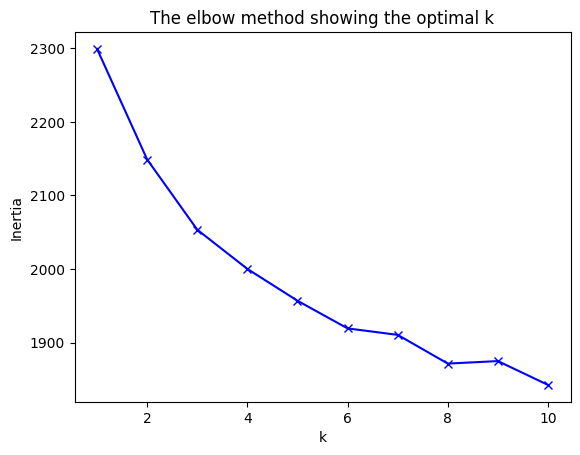

In [14]:
# Loop over values of k from 1 to 10
K=10
inertias_mbg = []

for k in range(1, K+1):
    # Instantiate the KMeans class with k clusters
    ##TODO##
    kmeansiris = KMeans(k)

    # Fit the model to the data
    ##TODO##
    kmeansiris.fit(df2)

    # Store the value of the inertia for this value of k
    ##TODO##
    inertias_mbg.append(kmeansiris.inertia_)

# Plot the elbow
##TODO##
plt.figure()
plt.plot(range(1, K+1), inertias_mbg, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')

In [15]:
k = 5
kmeansmbg = KMeans(k)

In [16]:
kmeansmbg.fit(df2)

KMeans(n_clusters=5)

In [17]:
df["assigned_cluster"] = kmeansmbg.predict(df2)

In [18]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,id,edit_history_tweet_ids,created_at,text,author_id,Unnamed: 0,text_cleaned,text_cleaned_stemmed,mdhugol_sentiment,mdhugol_sentiment_score,indobert_sentiment,indobert_sentiment_score,cs_embeddings,assigned_cluster
0,0,0,1880655687866552831,1880655687866552831,2025-01-18T16:37:11.000Z,Ketua Umum PDIP Megawati Soekarnoputri sempat ...,917707622026928129,NaN,ketua umum pdip megawati soekarnoputri sempat ...,ketua umum pdip megawati soekarnoputri sempat ...,neutral,0.989232,Neutral,0.999553,"[0.07435692, 0.002209755, 0.23171367, 0.071313...",3
1,1,1,1880655628819165446,1880655628819165446,2025-01-18T16:36:57.000Z,@HabilIsl Hold $WOWO dapat airdrop makan siang...,112500656,NaN,hold wowo dapat airdrop makansianggratis,hold wowo dapat airdrop makansianggratis,positive,0.912627,Neutral,0.999512,"[-0.032219347, 0.059673477, 0.27446902, 0.2554...",4
2,2,2,1880655540717842742,1880655540717842742,2025-01-18T16:36:36.000Z,KALAU MBG NYA INI GUE JUGA MAU DUT BIAR GUE MU...,1266052828742602752,NaN,kalau mbg nya ini gue juga mau dut biar gue mu...,kalau mbg nya ini gue juga mau dut biar gue mu...,negative,0.982285,Negative,0.999828,"[-0.013758699, 0.08193378, 0.021211023, -0.089...",2
3,3,3,1880655480122651014,1880655480122651014,2025-01-18T16:36:22.000Z,@neohistoria_id program MBG tuh B nya Bersyuku...,1838116873331945472,NaN,program mbg tuh b nya bersyukur bukan bergizi,program mbg tuh b nya syukur bukan gizi,negative,0.985092,Negative,0.996238,"[-0.13969253, -0.0147069255, 0.27004486, 0.064...",0
4,4,4,1880655463207117137,1880655463207117137,2025-01-18T16:36:17.000Z,@03__nakula Ga semua anak Indonesia bisa makan...,1511016593353936896,NaN,enggak semua anak indonesia bisa makan siang ...,enggak semua anak indonesia bisa makan siang i...,negative,0.990175,Neutral,0.564391,"[-0.06567369, 0.06387163, 0.13421394, -0.03468...",1


In [19]:
df.to_csv(r"dataset\processed\kmeans_result.csv")

In [20]:
df.to_excel(r"dataset\processed\kmeans_result.xlsx")